Problem 1: We saw in class how Taylor series/roundoff errors fight against each other when deciding how big a step size to use when calculating numerical derivatives. If we allow ourselves to evaluate our function f at four points (x±δ and x ± 2δ),

a) What should our estimate of the first derivative at x be? Rather than doing a complicated fit, I suggest thinking about how to combine the derivative from x ± δ with the derivative from x ± 2δ to cancel the next term in the Taylor series.

In [1]:
from IPython.display import Latex
Latex(r"""From Taylor expansion:\begin{eqnarray}
f(x+\delta)= f(x) + \delta f'(x) + \frac{\delta^2}{2} f''(x) + \frac{\delta^{3}}{3!} f'''(x) + \frac{\delta^{4}}{4!} f'''(x) + \mathcal{O}(\delta^{5}) \\
f(x-\delta)= f(x) - \delta f'(x) + \frac{\delta^2}{2} f''(x) - \frac{\delta^{3}}{3!} f'''(x) + \frac{\delta^{4}}{4!} f'''(x) - \mathcal{O}(\delta^{5}) \\
f(x+\delta)-f(x-\delta)= 2\delta f'(x) + \frac{2\delta^{3}}{3!} f'''(x) + \mathcal{O}(\delta^{5}) \\
f(x+\delta)-f(x-\delta)= 2\delta f'(x) + \frac{\delta^{3}}{3} f'''(x) + \mathcal{O}(\delta^{5}) \\
\frac{f(x+\delta)-f(x-\delta)}{2\delta}= f'(x) + \frac{\delta^2}{6} f'''(x) + \mathcal{O}(\delta^{4}) \\
\end{eqnarray}

Also from Taylor expansion but this time with 2
$\delta$: 
\begin{eqnarray}
f(x+2\delta)-f(x-2\delta)= 4\delta f'(x) + \frac{8\delta^{3}}{3} f'''(x) + \mathcal{O}(\delta^{5}) \\
\frac{f(x+2\delta)-f(x-2\delta)}{2\delta}= 2f'(x) + \frac{8\delta^2}{6}f'''(x) + \mathcal{O}(\delta^4) \\
\end{eqnarray}
Now, we combine the two:
\begin{eqnarray}
\frac{8(f(x+\delta)-f(x-\delta))-f(x+2\delta)+f(x-2\delta)}{2\delta}= 6f'(x) + \mathcal{O}(\delta^{4})\\
\end{eqnarray}
Thus, the formula is:
\begin{eqnarray}f'(x)=\frac{8(f(x+\delta)-f(x-\delta))-f(x+2\delta)+f(x-2\delta)}{12\delta}+ \mathcal{O}(\delta^4)
\end{eqnarray}
""")


<IPython.core.display.Latex object>

In [1]:
#In code 
import numpy as np
def firstderiv(x0,delta,fun):
    x=(x0-2*delta,x0-delta,x0+delta,x0+2*delta)
    y=fun(x)
    diff1= (y[2]-y[1])
    diff2= (y[3]-y[0])
    firstderiv= (8*diff1 -diff2)/(12*delta)
    return firstderiv
     
#Sanity Check  
fd=firstderiv(1,0.0000001,np.exp)
print("We find that d(exp(x))/dx evaluated at 1 is:",fd)
print("Which corresponds to our expectation of",np.exp(1)) 
print("The error is",abs(np.exp(1)-fd))

We find that d(exp(x))/dx evaluated at 1 is: 2.718281828887707
Which corresponds to our expectation of 2.718281828459045
The error is 4.286619947890813e-10


b) Now that you have your operator for the derivative, what should δ be in terms of the machine precision and various properties of the function? 

In [21]:
from IPython.display import Latex
Latex(r"""To find the ideal delta, let's try to minimize our error:
\begin{eqnarray}diff=\frac{8(f(x+\delta)-f(x-\delta))-f(x+2\delta)+f(x-2\delta)}{12\delta}+ \mathcal{O}(\delta^4)\\
Error=|diff-f'(x)|\\
Error\approx|\frac{f^{(5)}\delta^4}{4}+\frac{\epsilon_mf(x)}{2\delta}|
\end{eqnarray}
Where the first term is the order of $\delta^4$ left from our expression of diff, and $\epsilon_m$ is machine precision.
By minimizing this expression, we obtain: 
\begin{eqnarray}
\frac{dError}{d\delta}=0 \\
0=f^{(5)}\delta^3-\frac{\epsilon_mf(x)}{\delta^2} \\
f^{(5)}\delta^3=\frac{\epsilon_mf(x)}{\delta^2} \\
\delta^5=\frac{\epsilon_mf(x)}{f^{(5)}} \\
\end{eqnarray}
So if we assume that $f(x)\approx f^{(5)}(x)$, then the ideal $\delta$ is $\epsilon_m^{1/5}$, or $10^{-16/5}$.
""")

<IPython.core.display.Latex object>

b) (continued) Show for f(x) = exp(x) and f(x) = exp(0.01x) that your estimate of the optimal δ is at least roughly correct.

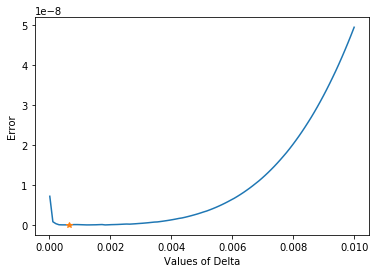

Our optimal delta (orange point) roughly gives minimum error.


In [77]:
import numpy as np
from matplotlib import pyplot as plt
def firstderiv(x0,delta,fun):
    x=(x0-2*delta,x0-delta,x0+delta,x0+2*delta)
    y=fun(x)
    diff1= (y[2]-y[1])
    diff2= (y[3]-y[0])
    firstderiv= (8*diff1 -diff2)/(12*delta)
    return firstderiv
     
delta=np.linspace(10**(-5),10**(-2),100)
optimal_delta=(10**(-16/5))
error= abs(np.exp(5)-firstderiv(5,delta,np.exp))
optimal_error=abs(np.exp(5)-firstderiv(5,optimal_delta,np.exp))
plt.clf()
plt.plot(delta,error)
plt.plot((10**(-16/5)),optimal_error,"*")
plt.xlabel('Values of Delta') 
plt.ylabel('Error')  
plt.show()
print('Our optimal delta (orange point) roughly gives minimum error.')


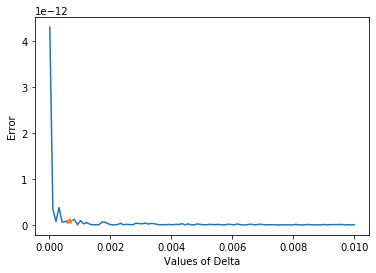

Our optimal delta (orange point) roughly gives minimum error.


In [79]:
import numpy as np
from matplotlib import pyplot as plt
def firstderiv(x0,delta,fun):
    x=(x0-2*delta,x0-delta,x0+delta,x0+2*delta)
    y=fun(x)
    diff1= (y[2]-y[1])
    diff2= (y[3]-y[0])
    firstderiv= (8*diff1 -diff2)/(12*delta)
    return firstderiv

def e001(x):
    y=np.exp(np.asarray(x)*0.01)
    return y

delta=np.linspace(10**(-5),10**(-2),100)
optimal_delta=(10**(-16/5))

exp001_A=0.01*np.exp(0.01) #analytical derivative
exp001_B=firstderiv(1,delta,e001) #using our algorithm and optimal delta
error2= abs(exp001_A-exp001_B)
optimal_error2=abs(0.01*np.exp(0.01)-firstderiv(1,optimal_delta,e001))
plt.clf()
plt.plot(delta,error2)
plt.plot(optimal_delta,optimal_error2,'*')
plt.xlabel('Values of Delta') 
plt.ylabel('Error') 
plt.show()
print('Our optimal delta (orange point) roughly gives minimum error.')

Problem 2:
Write a routine that will take an arbitrary voltage and interpolate to return a temperature.

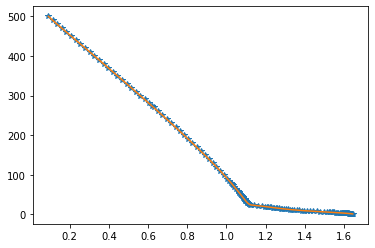

For a voltage of  1.4 V the temperature is 9.412486285451617 K, and the error is 9.26516856196713e-05


In [42]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate


def temperature(V):
    data = np.loadtxt("/Users/jmlascar/lakeshore.txt")
    data = np.transpose(data)
    temperature, voltage = data[0], data[1]
    ind=np.argsort(voltage)
    temperature=temperature[ind]
    voltage=voltage[ind]
    spln=interpolate.splrep(voltage,temperature)
    yy=interpolate.splev(V,spln)
    return yy

def temperature_odd(V):
    data = np.loadtxt("/Users/jmlascar/lakeshore.txt")
    data = np.transpose(data)
    temperature, voltage = data[0], data[1]
    ind=np.argsort(voltage)
    temperature=temperature[ind]
    temperature=temperature[1::2]
    voltage=voltage[ind]
    voltage=voltage[1::2]
    spln=interpolate.splrep(voltage,temperature)
    yy=interpolate.splev(V,spln)
    return yy

#just to get a nice plot:
data = np.loadtxt("/Users/jmlascar/lakeshore.txt")
data = np.transpose(data)
temp, volt = data[0], data[1]
plt.clf()
plt.plot(volt, temp,"*")
plt.plot(volt,temperature(volt))
plt.show()
plt.xlabel('Voltage (V)') 
plt.ylabel('Temperature (K)')  
#estimate error 



V=1.4
T=temperature(V)
error=abs(temperature_odd(V)-temperature(V))


if (V<9.0681e-02) or (V>1.64429):
    print("A voltage of",V,"V is outside the bounds of this interpolation.")
else:
    print("For a voltage of ",V,"V the temperature is",T,"K, and the error is",error)


Problem 3) Write a recursive variable step size integrator like the one we wrote in class that 
does NOT call f(x) multiple times for the same x. For a few typical examples, how many function calls do you save vs. the lazy way we wrote it in class?


In [59]:
import numpy as np

def myintegrate(fun,x1,x2,tracks=[[],[]],tol=1e-8): 
    
    x = np.linspace(x1,x2,5) #get 5 points that are evenly spaced between a and b
    y=[]
    neval=0  
        
    if len(tracks[0])<1: #first time, when we haven't called the function at all   
        for i in x:
            y_i=fun(i)
            tracks[0].append(i)
            tracks[1].append(y_i)
            y.append(y_i)
            neval=neval+1
    else:
        for i in x:
            if i in tracks[0]: #function has already been called for that x
                index = tracks[0].index(i)
                y.append(tracks[1][index])                
            else: #function has not been called for that x
                y_i=fun(i)
                tracks[0].append(i)
                tracks[1].append(y_i)
                y.append(y_i)
                neval=neval+1
    
    int1=(y[0]+4*y[2]+y[4])/6.0*(x2-x1) 
    int2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(x2-x1) 
    error=np.abs(int2-int1)
    
    if error<tol:
        return (16.0*int2-int1)/15.0,error,neval
    else:
        mid=0.5*(x1+x2)
        leftintegral,lefterror,leftneval=myintegrate(fun,x1,mid,tracks,tol/2.0)
        rightintegral,righterror,rightneval=myintegrate(fun,mid,x2,tracks,tol/2.0)
        neval=neval+leftneval+rightneval
        integral=leftintegral+rightintegral
        error=lefterror+righterror
        return integral,error,neval

#######WAY WE DID IN CLASS FOR COMPARISON:#######

def simple_integrate(fun,a,b,tol=10e-8):
    x=np.linspace(a,b,5)
    #np.median(np.diff(x))
    y=fun(x)
    neval=len(x) #let's keep track of function evaluations
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    myerr=np.abs(f2-f1)
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval
    else:
        mid=0.5*(b+a)
        f_left,err_left,neval_left=simple_integrate(fun,a,mid,tol/2.0)
        f_right,err_right,neval_right=simple_integrate(fun,mid,b,tol/2.0)
        neval=neval+neval_left+neval_right
        f=f_left+f_right
        err=err_left+err_right
        return f,err,neval

###############################
def exp2(x):
    y=np.exp(x**3)
    return y

def exp3(x):
    y=np.exp(-x)
    return y
    
intx=myintegrate(np.exp,0,2)
intclass=simple_integrate(np.exp,0,2)

intx2=myintegrate(exp2,0,2)
intclass2=simple_integrate(exp2,0,2)

print("Exp(x) integrated from 0 to 2: If we use our integral, we get", intx[2], "function calls,",intclass[2]-intx[2],"less than with the one done in class.")
print("Exp(x^3) integrated from 0 to 2:",intclass2[2]-intx2[2],"less function calls.")

Exp(x) integrated from 0 to 2: If we use our integral, we get 257 function calls, 58 less than with the one done in class.
Exp(x^3) integrated from 0 to 2: 4135 less function calls.


Problem 4

In [86]:
from IPython.display import Latex
Latex(r"""For an infinitesimally thin shell of radius R and charge density $\sigma$, 
the field E in spherical coordinates only has a z component:
\begin{eqnarray}E=\frac{1}{4\pi\epsilon_0}\int \frac{\sigma R^2 sin\theta d\theta d\phi (z-Rcos\theta)}{(R^2+z^2-2Rzcos\theta)^{3/2}} \\
\int d\phi = 2\pi \\
E =\frac{R^2\sigma}{2\epsilon_0}\int_0^{\pi} \frac{ (z-Rcos\theta)}{(R^2+z^2-2Rzcos\theta)^{3/2}}d\theta \\
\end{eqnarray}

""")

<IPython.core.display.Latex object>

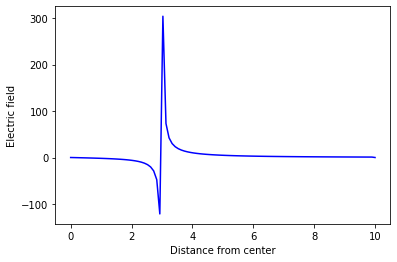

In [85]:
import numpy as np
from scipy.integrate import quad
import math

R=3 #radius
sigma=3 #charge density
epsilon=8.85400e-12 #vacuum permittivity 

#first, with quad
def integrand(theta,z,R):
    y=(z-R*np.cos(theta))/((R**2+z**2-2*R*z*np.cos(theta))**(3/2))
    return y
def integral_quad(z,R,sigma):
    y=quad(integrand, 0, math.pi,args=(z,R))[0]
    y= (sigma*R**2)*y
    return y

z=1
zz=np.linspace(0,10,100)

E2=np.zeros(100)
for i in range(0,99):
    z=zz[i]
    E2[i]=integral_quad(z,R,sigma)

    
 
plt.clf()
plt.plot(zz,E2,'b')
plt.xlabel('Distance from center') 
plt.ylabel('Electric field')  
plt.show()



I wasn't able to make this work for my own integrator, but we see that despite there being a singularity when we reach the radius of the infinitesimal shell, quad skips it.